In [1]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.1-py3-none-any.whl size=1042797 sha256=92e79e150ee7dd833a8dff835b798dff27ffede610617e01516cca4663f1dbf4
  Stored in directory: /root/.cache/pip/wheels/fe/c2/41/63e006b3312a4e17299bed5f83d985dea872368f9ab16bb20f
Successfully built dalex
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7e270a5b78532687bec33bec8c736e04d8c29e40fbae8709120913d530d29773
  Stored in dire

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import shap

# Load Data

In [3]:
# Load data
url = 'https://bit.ly/adv_bi_bank_cust_churn'
data = pd.read_csv(url)

In [4]:
data.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [6]:
data.describe()

,user_id,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
data.isnull().sum()

,0
user_id,0
attrition_flag,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0


In [8]:
data = data.drop(['user_id'], axis = 1)

In [9]:
# Mengisi missing values atau encoding data kategori
data.fillna('Unknown', inplace=True)
le = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = le.fit_transform(data[column])

# Simple EDA

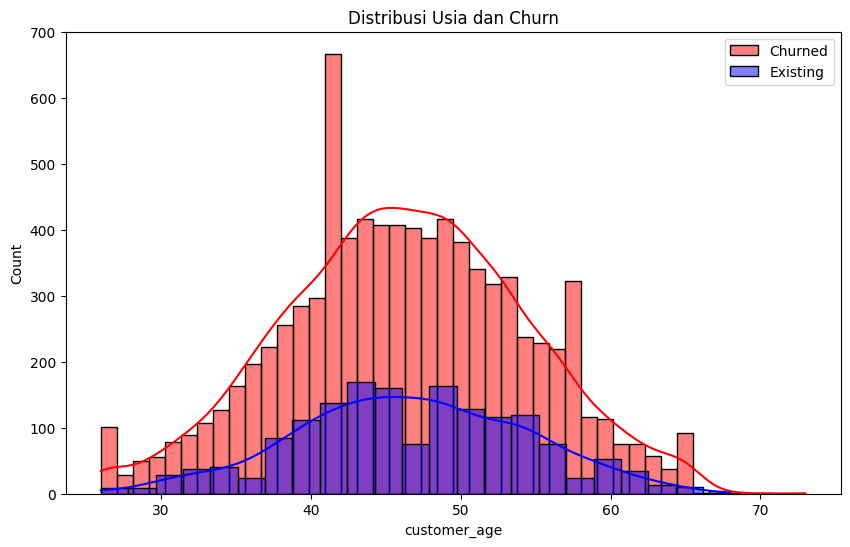

In [10]:
# Distribusi Usia Churn
plt.figure(figsize=(10,6))
sns.histplot(data[data['attrition_flag'] == 1]['customer_age'], kde=True, color='r', label="Churned")
sns.histplot(data[data['attrition_flag'] == 0]['customer_age'], kde=True, color='b', label="Existing")
plt.legend()
plt.title('Distribusi Usia dan Churn')
plt.show()

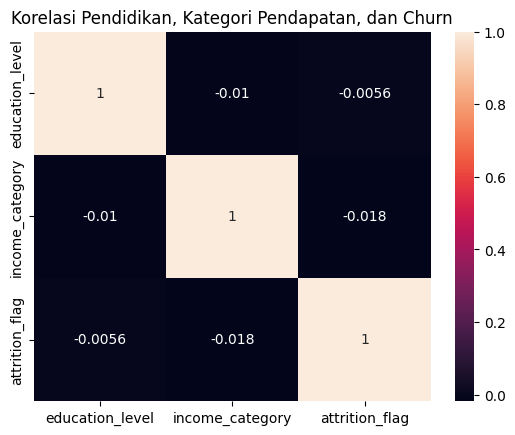

In [11]:
# Korelasi Pendidikan, Kategori Pendapatan, dan Churn
sns.heatmap(data[['education_level', 'income_category', 'attrition_flag']].corr(), annot=True)
plt.title('Korelasi Pendidikan, Kategori Pendapatan, dan Churn')
plt.show()

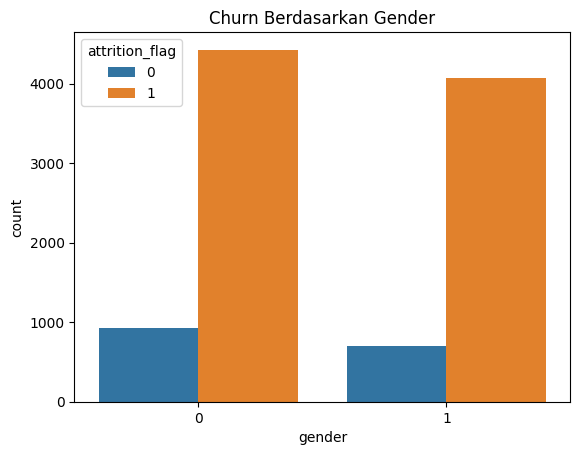

In [12]:
# Perbedaan Gender dan Churn
sns.countplot(x='gender', hue='attrition_flag', data=data)
plt.title('Churn Berdasarkan Gender')
plt.show()

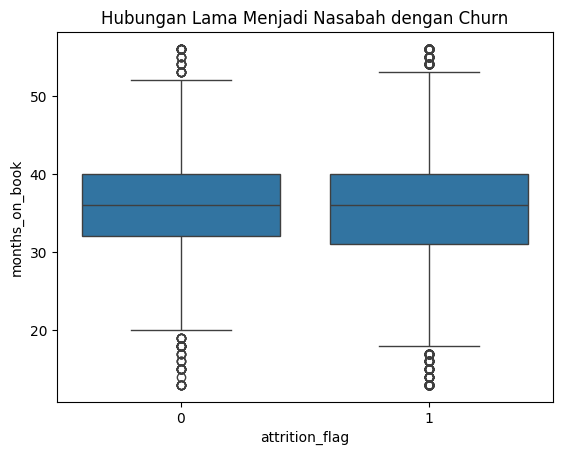

In [13]:
# Lama Menjadi Nasabah & Churn
sns.boxplot(x='attrition_flag', y='months_on_book', data=data)
plt.title('Hubungan Lama Menjadi Nasabah dengan Churn')
plt.show()

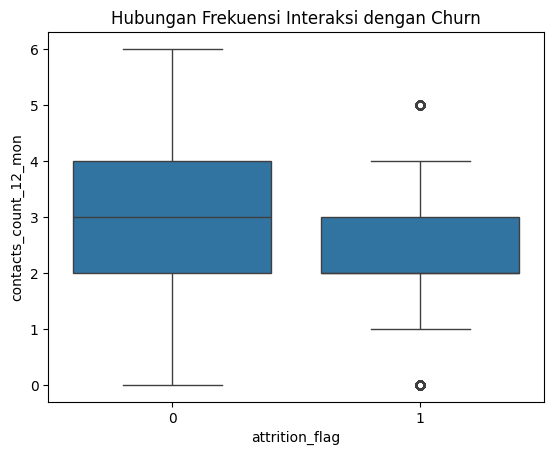

In [14]:
# Frekuensi Interaksi & Churn
sns.boxplot(x='attrition_flag', y='contacts_count_12_mon', data=data)
plt.title('Hubungan Frekuensi Interaksi dengan Churn')
plt.show()

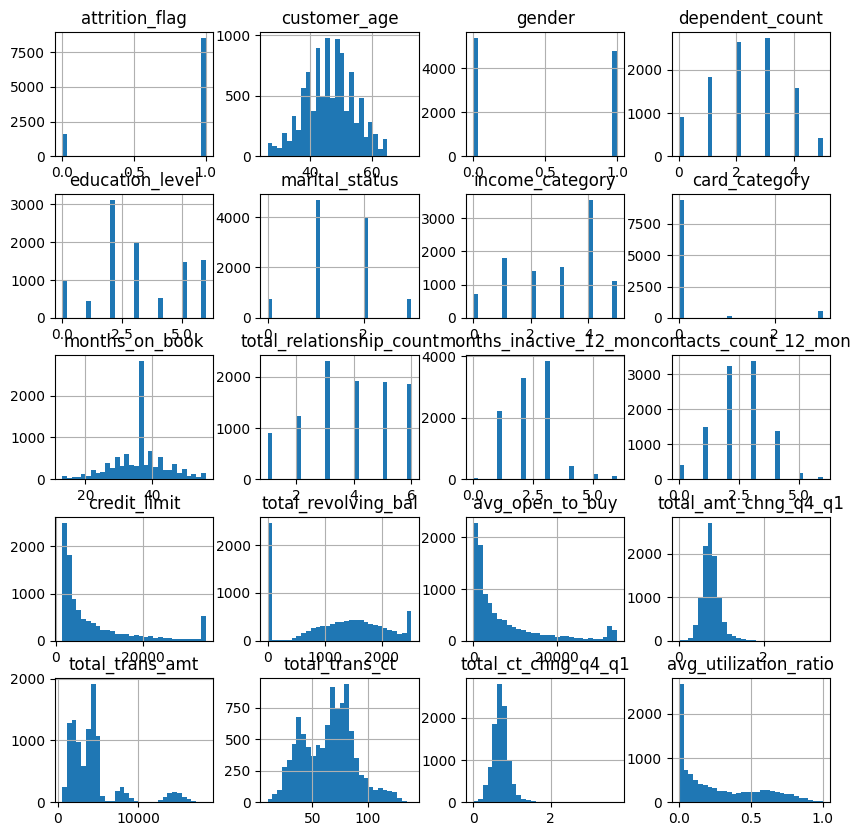

In [15]:
# check numerical data distribution
data.hist(bins=30, figsize = (10, 10));

# Split Data

In [16]:
X = data.drop(['attrition_flag'], axis=1)
y = data['attrition_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape

((8101, 19), (2026, 19))

In [18]:
y_train.value_counts(), y_test.value_counts()

(attrition_flag
 1    6801
 0    1300
 Name: count, dtype: int64,
 attrition_flag
 1    1699
 0     327
 Name: count, dtype: int64)

# Modelling

In [19]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9590325765054294
[[ 266   61]
 [  22 1677]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.87       327
           1       0.96      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



# EDA

## Confusion Matrix

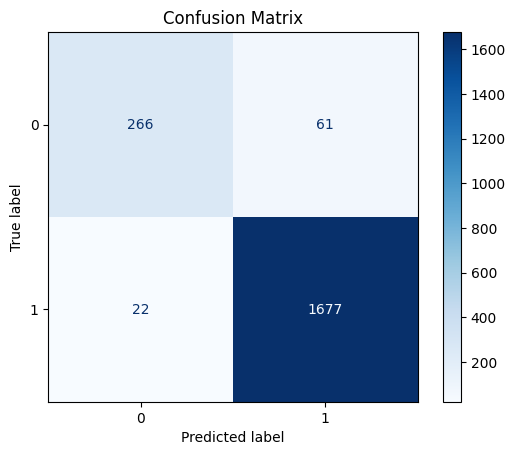

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

# Menghitung confusion matrix dan menampilkannya
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [21]:
# random forest prediction
rf_pred = model.predict(X_test)
rf_pred_proba = model.predict_proba(X_test)

In [22]:
# random forest prediction result

import sklearn.metrics as metrics

pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.923611,0.964902,0.959033,0.944257,0.958238
recall,0.813456,0.987051,0.959033,0.900253,0.959033
f1-score,0.865041,0.975851,0.959033,0.920446,0.957966
support,327.000000,1699.000000,0.959033,2026.000000,2026.000000


## ROC

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


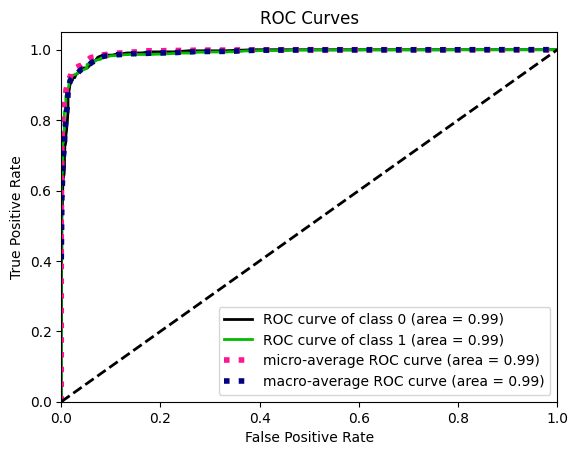

In [23]:
# random forest result

import scikitplot as skplt

skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

# Model Agnostics Method

In [24]:
## initiate explainer for Random Forest model

import dalex as dx

churn_exp = dx.Explainer(model, X_train, y_train, label = "RF Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8101 rows 19 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8101 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x78a0104ac4c0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.84, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.49, mean = -0.000291, max = 0.4
  -> model_info        : package sklearn

A new explainer has been created!


## Feauture Importance

In [25]:
# visualizr permutation feature importance for Random Forest Model
churn_exp.model_parts().plot()

## Partial Dependence Plot

In [26]:
# create partial dependence plot of Random Forest model
churn_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/19 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[26.   26.44 26.88 ... 69.12 69.56 70.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:   5%|▌         | 1/19 [00:00<00:10,  1.77it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.01 0.02 ... 0.98 0.99 1.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  11%|█         | 2/19 [00:01<00:08,  1.96it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:

## Shapley Value and Shapley Additive Explanations

In [27]:
# create sample used for developing shapley
data_for_shapley = X_train.sample(n = 1000, random_state = 1000)

In [28]:
# create SHAP Tree Explainer for random forest model with first 1000 rows of train data
rf_shap_values = shap.TreeExplainer(model).shap_values(data_for_shapley)

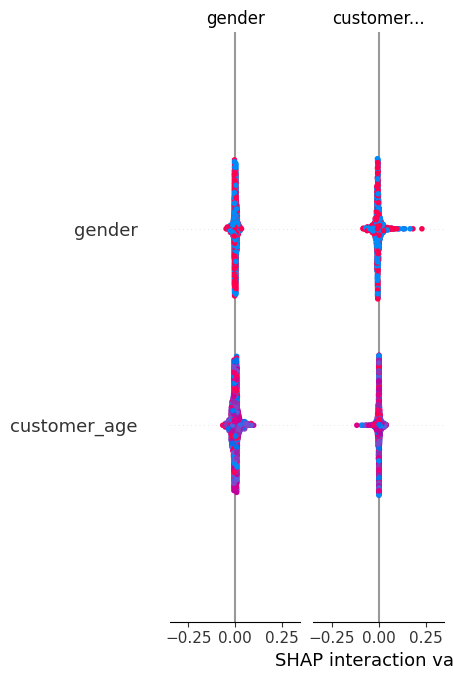

In [29]:
# create SHAP summary plot with next 1000 rows of train data
shap.summary_plot(rf_shap_values, X_train[1000:2000], plot_type='bar')